<h1> Modelo de ML:</h1>

<h3> Modelo basado en el contenido de las peliculas:  </h3>

In [2]:
#Importamos todas las librerias necesarias:
import pandas as pd
import dask.dataframe as dd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt

In [3]:
#Importamos el CSV
df_main = pd.read_csv("C:/Users/tomif/Desktop/Proyecto_1/peliculas.csv")

In [5]:
df_main.head()

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,...,production_countriesiso_3166_1,production_countriesname,spoken_languagesiso_639_1,spoken_languagesname,spoken_languages_names,spoken_languages_iso,genres_ids,genres_names,release_year,return
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,...,US,United States of America,en,English,English,en,16.0,Animation,1995.0,12.451801
1,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,...,US,United States of America,en,English,English,en,12.0,Adventure,1995.0,4.043035
2,0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,...,US,United States of America,en,English,English,en,10749.0,Romance,1995.0,0.000000
3,16000000,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,...,US,United States of America,en,English,English,en,35.0,Comedy,1995.0,5.090760
4,0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,...,US,United States of America,en,English,English,en,35.0,Comedy,1995.0,0.000000


<h3>Empezamos con nuestro Modelo RandomForest:</h3>

In [7]:
#Para trabajar con un modelo de RandomForest, vamos a dividir nuestro Main en un dataset mas chico que contenga las columnas que creemos necesarias

# Variables que deseamos mantener en el nuevo dataset
variables_deseadas = ['popularity', 'id','vote_average', 'vote_count', 'revenue']

# Crear un nuevo DataFrame con las variables seleccionadas
df_modelo1 = df_main[variables_deseadas].copy()

# Verificar el nuevo DataFrame
df_modelo1.head()

,popularity,id,vote_average,vote_count,revenue
0,21.946943,862,7.7,5415.0,373554033.0
1,17.015539,8844,6.9,2413.0,262797249.0
2,11.712900,15602,6.5,92.0,0.0
3,3.859495,31357,6.1,34.0,81452156.0
4,8.387519,11862,5.7,173.0,76578911.0


In [8]:
df_modelo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82915 entries, 0 to 82914
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    82915 non-null  float64
 1   id            82915 non-null  int64  
 2   vote_average  82915 non-null  float64
 3   vote_count    82915 non-null  float64
 4   revenue       82915 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 3.2 MB


<h3>Modelamiento:</h3>

In [9]:
# Seleccionar todas las columnas excepto la variable objetivo
X = df_modelo1.drop(columns=['popularity'])

# Variable objetivo
y = df_modelo1['popularity']

# Dividimos los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos y entrenamos el modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predecimos con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluamos el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R^2: {r2}')

MSE: 22.622402181383666
R^2: 0.4083744044208385


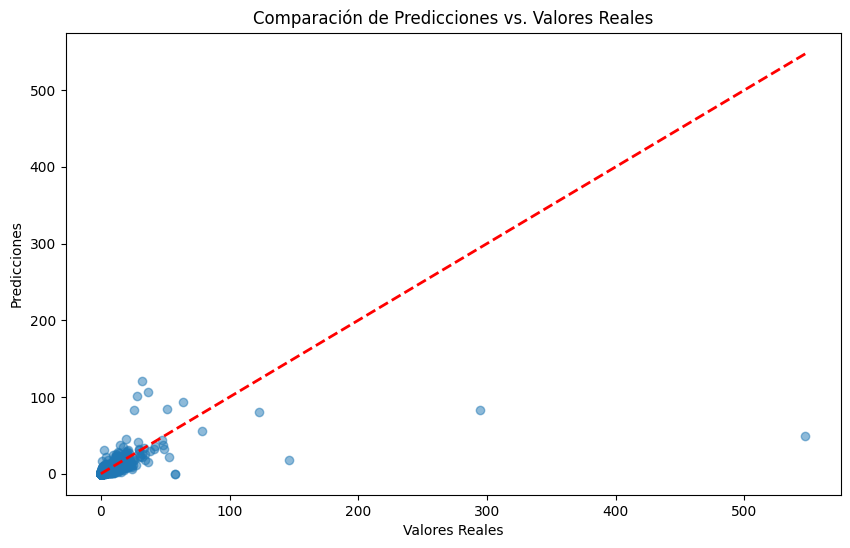

In [10]:
#Visualizamos el modelo Random Forest

# Creamos una gráfica de dispersión de las predicciones vs. los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Predicciones vs. Valores Reales')
plt.show()

In [11]:
# Vamos a hacer un codigo que nos indique las peliculas recomendadas con nuestro modelo

# Eliminamos la columna 'popularity' si está presente
X_peliculas = df_modelo1.drop('popularity', axis=1) 

# Predecimos la popularidad de las películas en df_movies
df_modelo1['predicted_popularity'] = model.predict(X_peliculas)

# Ordenamos las películas por popularidad predicha en orden descendente
df_predicciones = df_modelo1.sort_values(by='predicted_popularity', ascending=False)

# Seleccionamos las 10 películas con mayor popularidad predicha
top_10_peliculas = df_predicciones.head(10)

# Mostramos las 10 películas recomendadas
print(top_10_peliculas[['id', 'predicted_popularity']])

           id  predicted_popularity
42124  321612            216.080669
43540  339403            170.180013
24410  177572            154.405813
14540   19995            145.451769
23632  210577            141.642241
24306  245891            136.070133
26517  293660            135.638034
26519  283995            131.361098
26520  271110            121.229906
24813  205596            120.939470


<h3>Vamos a unir el dataset con la nueva columna de predicciones al main </h3>

In [12]:
# Unimos df_predicciones a df_main utilizando 'id' como referencia

df_main = pd.merge(df_main, df_predicciones[['id', 'predicted_popularity']], on='id', how='left')

In [13]:
df_main.head()

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,...,production_countriesname,spoken_languagesiso_639_1,spoken_languagesname,spoken_languages_names,spoken_languages_iso,genres_ids,genres_names,release_year,return,predicted_popularity
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,...,United States of America,en,English,English,en,16.0,Animation,1995.0,12.451801,21.267371
1,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,...,United States of America,en,English,English,en,12.0,Adventure,1995.0,4.043035,16.230109
2,0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,...,United States of America,en,English,English,en,10749.0,Romance,1995.0,0.000000,10.733043
3,0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,...,United States of America,en,English,English,en,10749.0,Romance,1995.0,0.000000,10.733043
4,16000000,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,...,United States of America,en,English,English,en,35.0,Comedy,1995.0,5.090760,4.314468


In [23]:
df_main.to_csv("Main.csv")

<h3>Funcion para la API </h3>

In [21]:
def recomendar_peliculas(titulo: str):

    # Convertimos el título dado a minúsculas
    titulo_lower = titulo.lower()
    
    # Filtramos el dataset para encontrar la película dada (ignorando mayúsculas/minúsculas)
    pelicula_dada = df_main[df_main['title'].str.lower() == titulo_lower]
    
    if pelicula_dada.empty:
        return f"No se encontró la película con el título: {titulo}"
    
    # Obtenemos el género de la película dada
    genero_dado = pelicula_dada.iloc[0]['genresname']
    
    # Filtramos el dataset para encontrar películas del mismo género
    peliculas_similares = df_main[df_main['genresname'].str.contains(genero_dado, na=False)]
    
    # Ordenamos por popularidad predicha en orden descendente
    peliculas_ordenadas = peliculas_similares.sort_values(by='predicted_popularity', ascending=False)
    
    # Excluimos la película dada de las recomendaciones (si está en la lista)
    peliculas_ordenadas = peliculas_ordenadas[peliculas_ordenadas['title'].str.lower() != titulo_lower]
    
    # Seleccionamos los títulos de las 5 mejores películas y mantener el orden
    recomendaciones = peliculas_ordenadas.head(5)[['title', 'genresname', 'predicted_popularity']].reset_index(drop=True)
    
    # Insertamos la película dada como primera fila en las recomendaciones
    recomendaciones = pd.concat([pelicula_dada[['title', 'genresname', 'predicted_popularity']], recomendaciones]).reset_index(drop=True)
    
    # Manejamos el caso donde no se encontró la película
    if isinstance(recomendaciones, str):
        print(recomendaciones)
    else:
        # Imprimimos la película seleccionada y las recomendaciones ordenadas por popularidad
        print(f"La película que eligió es: {recomendaciones.iloc[0]['title']} / Género: {recomendaciones.iloc[0]['genresname']} / Popularidad predicha: {recomendaciones.iloc[0]['predicted_popularity']}\n")
        print("Sus películas recomendadas son:\n")
        for idx, row in recomendaciones.iloc[1:].iterrows():
            print(f"{idx}. {row['title']} / Género: {row['genresname']} / Popularidad predicha: {row['predicted_popularity']}")
            print("\n")

    return recomendaciones

# Ejemplo de uso
titulo_pelicula = 'toy Story'
recomendaciones = recomendar_peliculas(titulo_pelicula)



La película que eligió es: Toy Story / Género: Animation / Popularidad predicha: 21.26737100999998

Sus películas recomendadas son:

1. Zootopia / Género: Animation / Popularidad predicha: 44.47307195000001


2. Finding Nemo / Género: Animation / Popularidad predicha: 31.00040903999996


3. Sing / Género: Animation / Popularidad predicha: 30.652877750000037


4. Monsters, Inc. / Género: Animation / Popularidad predicha: 27.182785579999976


5. Frozen / Género: Animation / Popularidad predicha: 27.039642940000004


